In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models

2023-03-09 13:31:20.312645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [71]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= 20000)
# 자주쓰이는 단어 20000개 까지만 사용을 하고, 나머지는 [unk] (여기 코드는 0 으로 바꿈)
#train Return : lists of sequences, which are lists of indexes (integers).
#test Return : 0,1 binary
print(x_test[0])
print(type(x_test[0]))
print(x_test)

[1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717]
<class 'list'>
[list([1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717])
 list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 10626, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 16873, 19, 861, 1074, 5, 1987, 17975, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 1

In [65]:
print(type(x_test))

<class 'numpy.ndarray'>


In [50]:
# Train 데이터는 이미 토근화된 정수로 이루어져있다. 또한 Num_words를 20000으로 설정했기 때문에, 리스트의 원소 최대값은 20000 이다.
print(x_train.shape)
# print(x_train[0])
word_to_idx = imdb.get_word_index()
idx_to_word = dict([(value, key) for (key, value) in word_to_idx.items()])
 
decoded_review = ' '.join([idx_to_word.get(i) for i in x_train[0]])
print(decoded_review)

(25000,)
the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one

In [34]:
import numpy as np
x_train.shape
# 리뷰(데이터) 의 길이가  다 다르다! 
# 길이를 몇 정도로 통일하는게 좋을지 가설을 내려보자

## 리뷰 길이 구하기
len_review = []
for sentence in x_train:
    len_review.append(len(sentence))

#len_review = [len(review) for review in x_train]


리뷰의 최댓값 2494
리뷰의 평균 238.71364


(array([9.920e+02, 2.498e+03, 7.078e+03, 4.375e+03, 2.655e+03, 1.736e+03,
        1.336e+03, 9.880e+02, 7.260e+02, 5.830e+02, 4.280e+02, 3.370e+02,
        2.690e+02, 2.080e+02, 1.650e+02, 1.410e+02, 1.170e+02, 8.000e+01,
        7.600e+01, 1.030e+02, 8.000e+01, 7.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  11.  ,   60.66,  110.32,  159.98,  209.64,  259.3 ,  308.96,
         358.62,  408.28,  457.94,  507.6 ,  557.26,  606.92,  656.58,
         706.24,  755.9 ,  805.56,  855.22,  904.88,  954.54, 1004.2 ,
        1053.86, 1103.52, 1153.18, 1202.84, 1252.5 , 1302.16, 1351.82,
        1401.48, 1451.14, 1500.8 , 1550.46, 1600.12, 1649.78, 1699.44,
        1749.1 , 1798

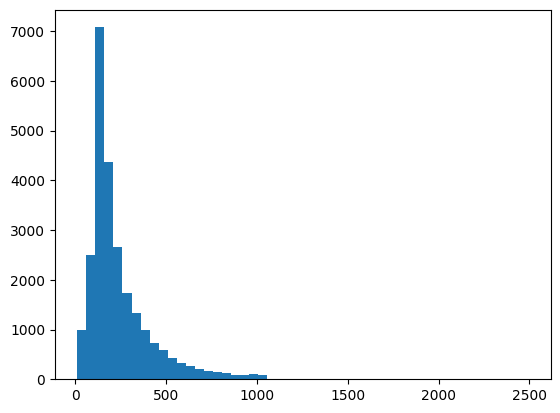

In [38]:
print(f'리뷰의 최댓값 {np.max(len_review)}')
print(f'리뷰의 평균 {np.mean(len_review)}')
# 리뷰 최대값을 평균에 근접한 240으로 설정하자
import matplotlib.pyplot as plt
plt.hist(len_review,bins=50)
# 길이 를 238로 잡자!

In [54]:
# 길이 맞춰주기 ,240 보다 긴애들은 날아가고 포기, 챗봇도 글자수에 제한하는 것이 같은은 원리
#pad_sequences 0을 아에 넣으나 뒤에 넣으나 성능 차이는 없음.
x_train = sequence.pad_sequences(x_train, maxlen = 240)
x_test = sequence.pad_sequences(x_test, maxlen = 240)


[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [11]:
x_train.shape
# x_train[0]

(25000, 240)

## 모델 구축해보기 

In [17]:
# Sequential 형태도 쌓을 수 있지만, 함수형 형태로 구성해보자.
x = layers.Input((240,))  # 들어갈 1개 문장길이는 240개(이후 1개의 단어는 128 길이벡터(=가중치)로 변경됨), 128은 임의로 정한것임
h = layers.Embedding(input_dim = 20000, output_dim = 128)(x)  #num_words=20000  즉, max_feature 20,000개, 128차원 벡터(=가중치의 갯수)의 output이 생성 
h = layers.SimpleRNN(128)(h) # 벡터로 바뀐 h 를 layer로 설정  #layers.LSTM(128)(h)
y = layers.Dense(1,activation = 'sigmoid')(h)   # 긍정부정 output

In [18]:
print(x) # input
print(h) # hidden layer
print(y) # ouput

KerasTensor(type_spec=TensorSpec(shape=(None, 240), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='simple_rnn_1/strided_slice_3:0', description="created by layer 'simple_rnn_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")


In [41]:
#왜 멈추냐 ㅠㅠ
model = models.Model(x,y)
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
model.fit(x_train,y_train,
          batch_size = 32,
          epochs = 3,
          validation_data=(x_test,y_test))

Epoch 1/3
782/782 [==============================] - 130s 164ms/step - loss: 0.3610 - accuracy: 0.8524 - val_loss: 0.4495 - val_accuracy: 0.8018
Epoch 2/3
782/782 [==============================] - 136s 174ms/step - loss: 0.4526 - accuracy: 0.7807 - val_loss: 0.5452 - val_accuracy: 0.7710
Epoch 3/3
782/782 [==============================] - 115s 147ms/step - loss: 0.3188 - accuracy: 0.8682 - val_loss: 0.5297 - val_accuracy: 0.7595


최종 모델성능 79%

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 240, 128)          2560000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


# 문장하나를 예측해보기

In [79]:
import numpy as np
sentence = 'i love you' # 실제로는 인덱스 + 3 
# model.predict()
sentence_int = list()
sentence_int.append(int(word_to_idx['i'])+3)
sentence_int.append(int(word_to_idx['love'])+3)
sentence_int.append(int(word_to_idx['love'])+3)
# sentence_int = np.asarray(sentence_int)

[sentence_int]

[[13, 119, 119]]

In [81]:
iloveyou_test = sequence.pad_sequences([sentence_int], maxlen = 240)

In [86]:
model.predict(iloveyou_test)

1/1 [==============================] - 0s 56ms/step


array([[0.98595846]], dtype=float32)